# Alberi di decisione 
 
---

## Iris Dataset


In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
os.environ["PATH"] += os.pathsep + './graphviz/release/bin/'
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

iris = load_iris()
df = sns.load_dataset("iris")

In [2]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


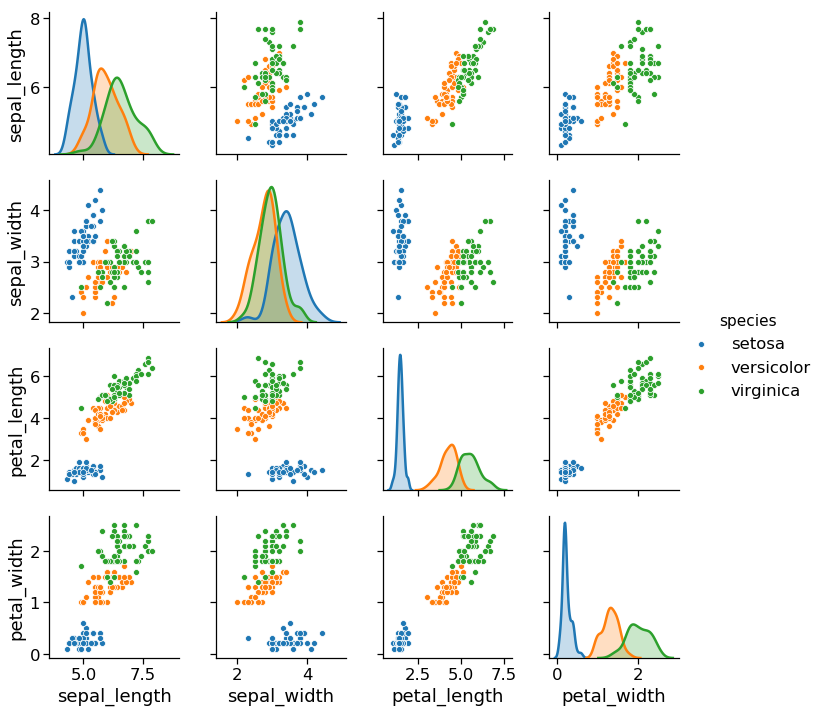

In [3]:
sns.pairplot(df, hue="species")

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.20, random_state=42)
    
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


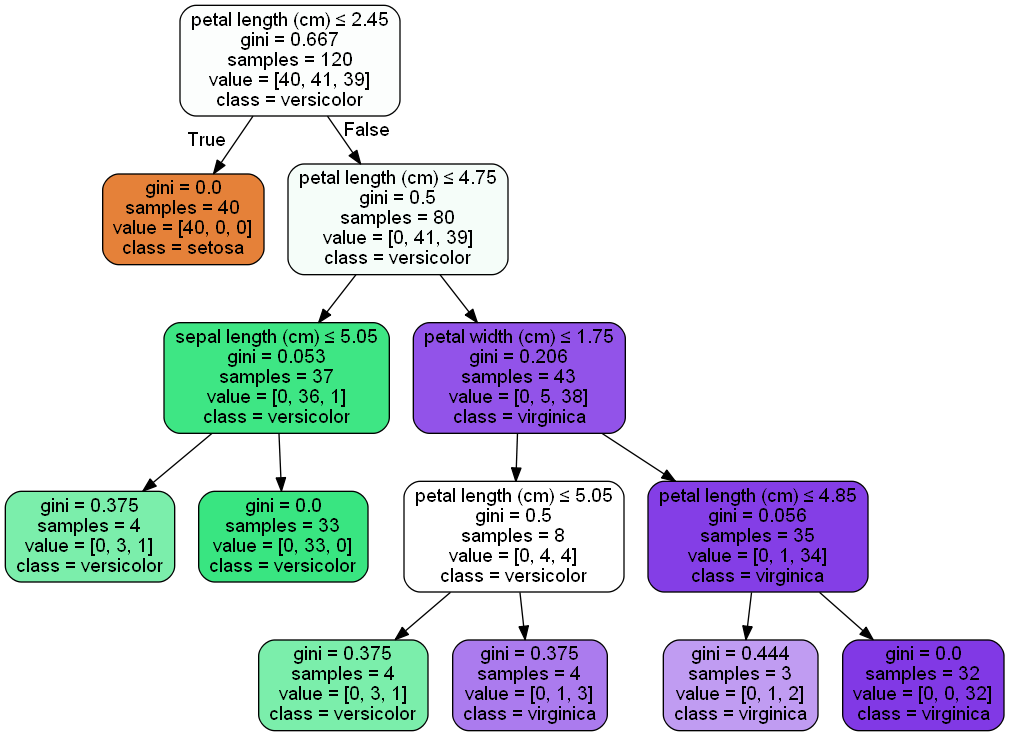

In [5]:
from io import StringIO
from IPython.display import Image
import pydot
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_leaf=3)
clf = clf.fit(X_train, y_train)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [6]:
y_pred=clf.predict(X_test)

In [7]:
print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [8]:
print("Decision Tree Classifier report \n", classification_report(y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

